In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.duplicated().value_counts()

False    21613
dtype: int64

In [5]:
pd.set_option("display.max_columns", None)
describe = df.describe()
print(describe)

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

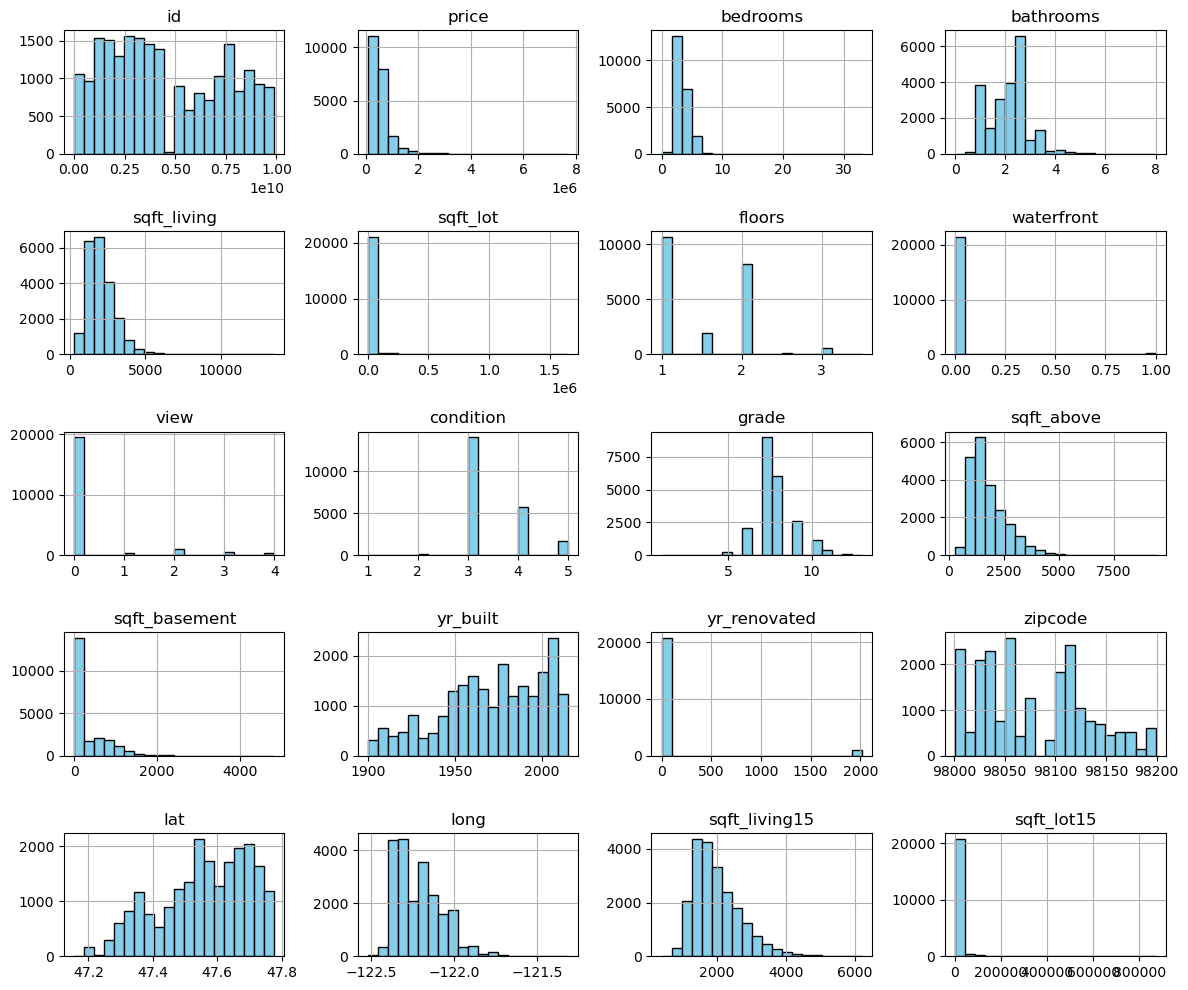

In [6]:
df.hist(bins=20, color="skyblue", edgecolor="black", figsize=(12, 10))
plt.tight_layout()
plt.show()

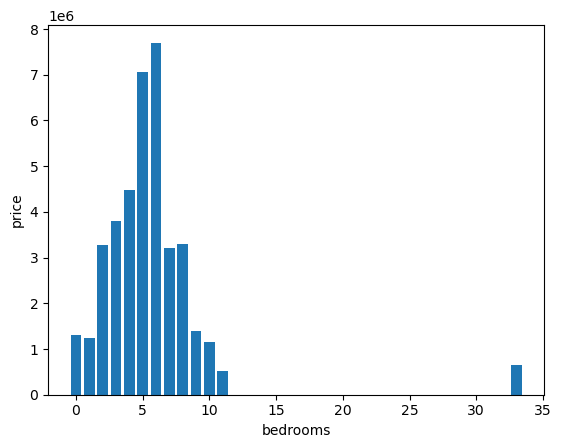

In [7]:
plt.bar(df["bedrooms"], df["price"])
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

In [8]:
bedrooms = df[df["bedrooms"] > df["bedrooms"].quantile(0.95)]
sorted_bedrooms = bedrooms.sort_values(by="bedrooms")
sorted_bedrooms.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18443,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,3,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
16844,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,3,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
6079,9822700190,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,3,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000
4096,1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,3,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
4235,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,3,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [9]:
df.drop(df[df["bedrooms"] > 11].index, inplace=True)
df.sort_values(by="bedrooms").tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6079,9822700190,20140808T000000,1280000.0,9,4.50,3650,5000,2.0,0,0,3,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000
16844,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,0,3,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
4235,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,0,3,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
18443,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,0,3,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
4096,1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,0,3,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960


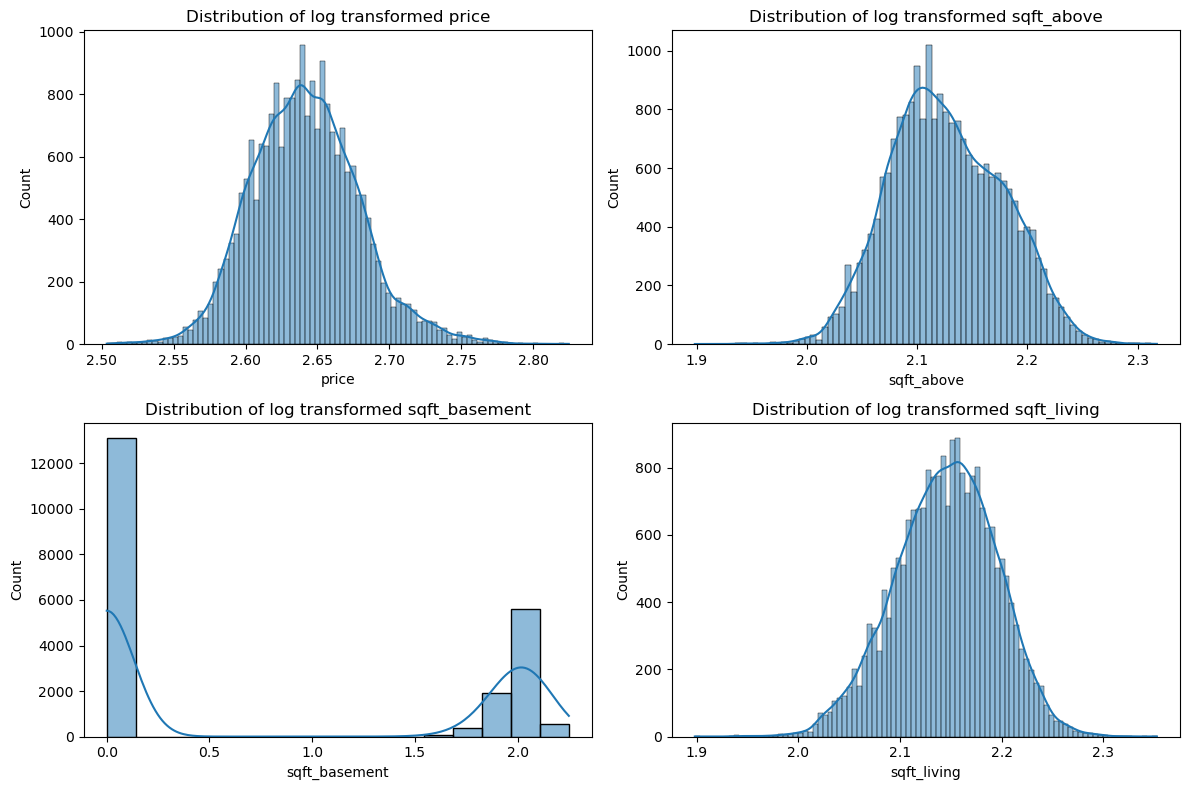

In [11]:
columns = ["price", "sqft_above", "sqft_basement", "sqft_living"]
df[columns] = df[columns].apply(np.log1p)
plt.figure(figsize=(12, 8))

for i, columns in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[columns], kde=True)
    plt.title(f"Distribution of log transformed {columns}")

plt.tight_layout()
plt.show()

<AxesSubplot: >

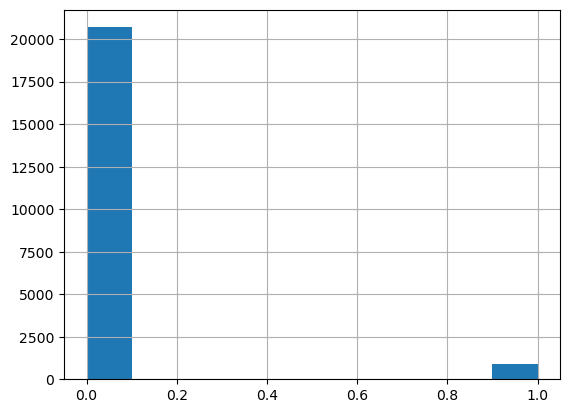

In [12]:
df["new_yr_renovated"] = (df["yr_renovated"] > 0).astype(int)
df = df.drop("yr_renovated", axis=1)
df["new_yr_renovated"].hist()

<AxesSubplot: >

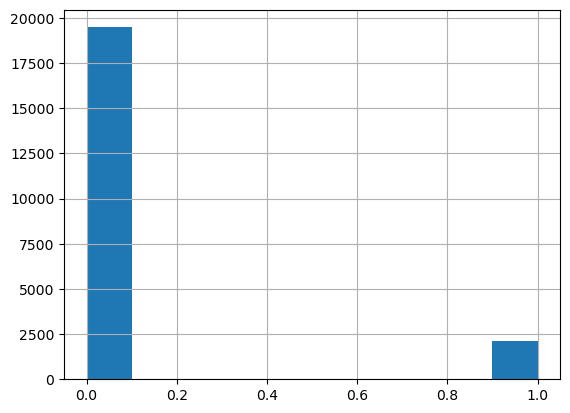

In [14]:
df["new_view"] = (df["view"] > 0).astype(int)
df = df.drop("view", axis=1)
df["new_view"].hist()

In [17]:
# Split the year and month to new column
df['date_month'] = df.date.dt.month
df['date_year'] = df.date.dt.year
df.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [18]:
# drop unnecessary column
X = df.drop(['id','price','date'], axis=1)
y = df['price']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (17289, 18) (17289,)
Testing set shape: (4323, 18) (4323,)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.score(X_test, y_test)

0.7750025876032347

In [21]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('Intercept:', model.intercept_)

coefficients = list(zip(X_test.columns, model.coef_))
print('\nCoefficients:')
for feature, coefficient in coefficients:
    print(f'{feature}: {coefficient}')

Mean Squared Error: 0.0003211727023527679
Intercept: 0.8712635034914029

Coefficients:
bedrooms: -0.0015487427965445511
bathrooms: 0.00490159084812361
sqft_living: 0.08790638956681884
sqft_lot: 3.223986421934821e-08
floors: 0.004996225002144928
waterfront: 0.03217824798779348
condition: 0.00428639299112208
grade: 0.011121504281065692
sqft_above: 0.0984287174319652
sqft_basement: 0.0032187412518726957
yr_built: -0.0002549768557119252
zipcode: -4.12338525953215e-05
lat: 0.10027852130912095
long: -0.008337024639984968
sqft_living15: 7.235600312674433e-06
sqft_lot15: -9.837892936039507e-09
new_yr_renovated: 0.004595154873212947
new_view: 0.010570106403741347


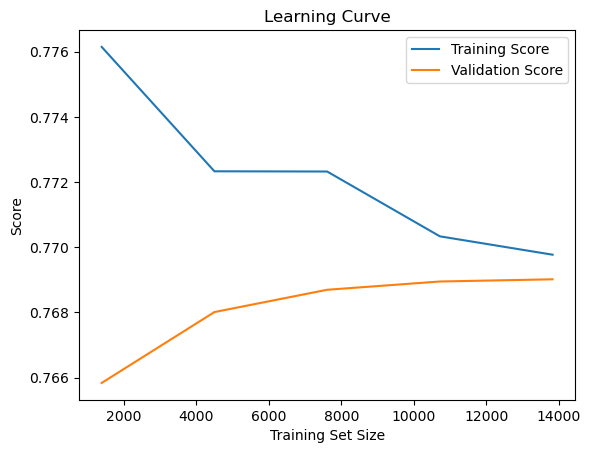

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()